# A Two-Layer Neural Network for Classification

In this exercise, you will implement and train a linear classifier using cross entropy loss. We will reuse most of the code (and the cells) that we developed in Task 1.

Please complete all cells and answer questions asked in the cells if you want to get a full grade.

In [15]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from ceng783.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We will use the class `TwoLayerNet` in the file `ceng783/neural_net.py` to represent instances of our network. Like in Task 1 & Task 2, the network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [16]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 2, 2, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `ceng783/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the first two tasks: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters.

The first layer uses ReLU as the activation function. The output layer does not use any activation functions.

As the loss, you should use cross-entropy loss (using the softmax function first to obtain the propabilities).

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [17]:
scores = net.loss(X)
print 'Your scores:'
print scores
print
print 'correct scores:'
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print correct_scores


# The difference should be very small. We get < 1e-7
print 'Difference between your scores and correct scores:'
print np.sum(np.abs(scores - correct_scores))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]
Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [30]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print 'Difference between your loss and correct loss:'
print np.sum(np.abs(loss - correct_loss))

(5, 3)
(3,)
Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [41]:
from ceng783.utils import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-5 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name])
  print '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

W1 max relative error: 5.954442e-04
W2 max relative error: 3.757048e-04
b2 max relative error: 8.250815e-06
b1 max relative error: 5.723668e-06


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the previous exercises. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.015543351766019944


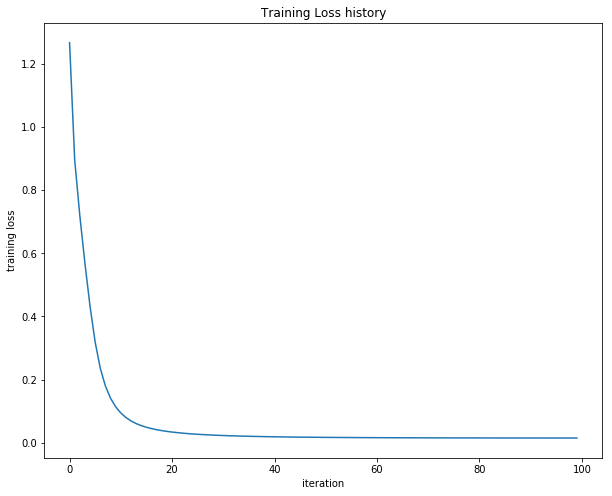

In [42]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print 'Final training loss: ', stats['loss_history'][-1]

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Loading the MNIST Dataset

MNIST (http://yann.lecun.com/exdb/mnist/) is one of the popular datasets used for testing machine learning models. It contains hand-written digits as grayscale images with 28x28 resolution. There are 60,000 samples for training (10,000 of which is usually used for validation), and 10,000 for testing. Although there are more challenging datasets available, MNIST is a good starting point for testing early versions of the models and as a sanity check.

Since more challenging datasets require more memory and lead to bigger models that require more computational power, we will stick with the MNIST dataset for the first HW.

In [43]:
# First run the "get_data.sh" under metu/data/ in your terminal.
# Then this cell will load the raw MNIST data.
#
#
from ceng783.utils import load_mnist
mnist_file = 'ceng783/data/mnist.pkl.gz'
X_train, y_train, X_val, y_val, X_test, y_test = load_mnist(mnist_file)

# As a sanity check, we print out the size of the training and test data.
print 'Training data shape: ', X_train.shape
print 'Training labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Training data shape:  (50000, 784)
Training labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


In [44]:
# Subsample the data for faster experiments in this exercise.
num_training = 10000
num_validation = 1000
num_test = 1000

X_train = X_train[1:num_training]
y_train = y_train[1:num_training]

X_val = X_val[1:num_validation]
y_val = y_val[1:num_validation]

X_test = X_test[1:num_test]
y_test = y_test[1:num_test]

print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (9999, 784)
Train labels shape:  (9999,)
Validation data shape:  (999, 784)
Validation labels shape:  (999,)
Test data shape:  (999, 784)
Test labels shape:  (999,)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


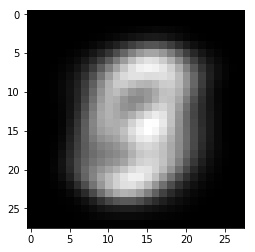

In [45]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)

# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

print mean_image[:10] # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((28,28))) # visualize the mean image

# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [46]:
input_size = 28*28
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=2000, batch_size=32,
            learning_rate=0.1, learning_rate_decay=0.95,
            reg=0.001, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc


iteration 0 / 2000: loss 2.302585
iteration 100 / 2000: loss 2.298307
iteration 200 / 2000: loss 1.963204
iteration 300 / 2000: loss 1.170924
iteration 400 / 2000: loss 0.732390
iteration 500 / 2000: loss 0.463226
iteration 600 / 2000: loss 0.526600
iteration 700 / 2000: loss 0.355707
iteration 800 / 2000: loss 0.196978
iteration 900 / 2000: loss 0.526733
iteration 1000 / 2000: loss 0.378395
iteration 1100 / 2000: loss 0.246864
iteration 1200 / 2000: loss 0.662595
iteration 1300 / 2000: loss 0.315803
iteration 1400 / 2000: loss 0.250533
iteration 1500 / 2000: loss 0.121131
iteration 1600 / 2000: loss 0.290563
iteration 1700 / 2000: loss 0.335152
iteration 1800 / 2000: loss 0.202653
iteration 1900 / 2000: loss 0.424759
Validation accuracy:  0.9079079079079079


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

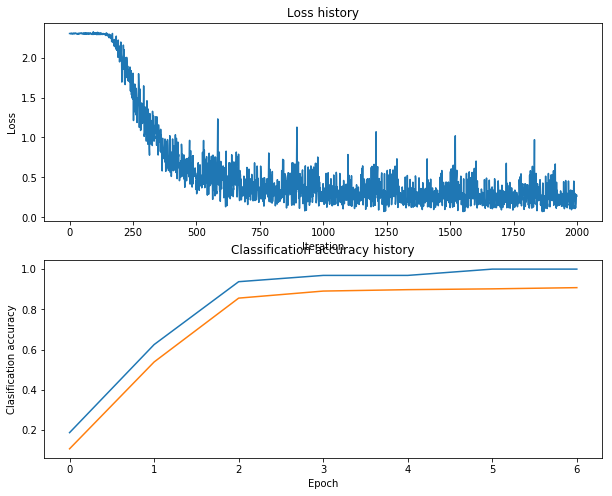

In [47]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

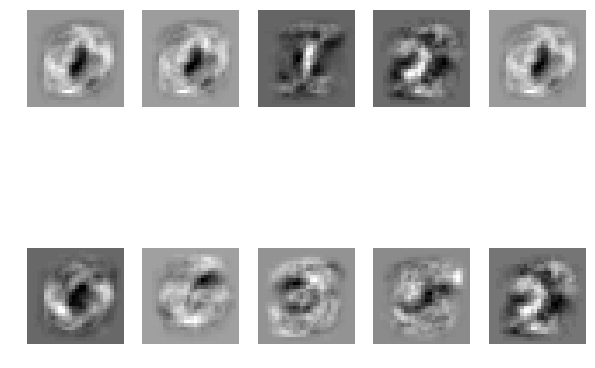

In [48]:
## Let us visualize some of the weights of the first layer

w = net.params['W1']

w = w.reshape(28, 28, hidden_size)
w_min, w_max = np.min(w), np.max(w)

for i in xrange(10):
  plt.subplot(2, 5, i + 1)
    
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')

# Tune your hyperparameters

Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value. You should get ~%94 validation accuracy.

In [49]:
best_net = None # store the best model into this 
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
results = {}
best_val = -1

learning_rates = [1, 1.4e-1,1.8e-2]
regularization_strengths = [0.1, 0.01, 0.001]    
input_size = 28*28
hidden_size = [10,100,200]
num_classes = 10
k=0
while k<len(hidden_size):
    i=0
    while i< len(learning_rates):
        j = 0
        while j < len(regularization_strengths):
            net = TwoLayerNet(input_size, hidden_size[k], num_classes)
            stats = net.train(X_train, y_train, X_val, y_val,
                num_iters=2000, batch_size=200,
                learning_rate=learning_rates[i], learning_rate_decay=0.95,
                reg=regularization_strengths[j])
            val_acc = (net.predict(X_val) == y_val).mean()
            train_acc = (net.predict(X_train) == y_train).mean()

            if best_val < val_acc:
                best_val = val_acc
                best_net = net
            results[(hidden_size[k],learning_rates[i], regularization_strengths[j])] = (train_acc, val_acc)
            j=j+1
        i=i+1
    k=k+1
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################
for hs, lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(hs,lr, reg)]
    print 'hs: %e lr: %e reg: %e train accuracy: %f val accuracy: %f' % (
                hs,lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

bitti usta
hs: 1.000000e+01 lr: 1.800000e-02 reg: 1.000000e-03 train accuracy: 0.112711 val accuracy: 0.107107
hs: 1.000000e+01 lr: 1.800000e-02 reg: 1.000000e-02 train accuracy: 0.112711 val accuracy: 0.107107
hs: 1.000000e+01 lr: 1.800000e-02 reg: 1.000000e-01 train accuracy: 0.112711 val accuracy: 0.107107
hs: 1.000000e+01 lr: 1.400000e-01 reg: 1.000000e-03 train accuracy: 0.920592 val accuracy: 0.892893
hs: 1.000000e+01 lr: 1.400000e-01 reg: 1.000000e-02 train accuracy: 0.908191 val accuracy: 0.875876
hs: 1.000000e+01 lr: 1.400000e-01 reg: 1.000000e-01 train accuracy: 0.761876 val accuracy: 0.730731
hs: 1.000000e+01 lr: 1.000000e+00 reg: 1.000000e-03 train accuracy: 0.964896 val accuracy: 0.909910
hs: 1.000000e+01 lr: 1.000000e+00 reg: 1.000000e-02 train accuracy: 0.928093 val accuracy: 0.897898
hs: 1.000000e+01 lr: 1.000000e+00 reg: 1.000000e-01 train accuracy: 0.808681 val accuracy: 0.784785
hs: 1.000000e+02 lr: 1.800000e-02 reg: 1.000000e-03 train accuracy: 0.207221 val accuracy

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set. 

In [50]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc

Test accuracy:  0.9359359359359359
